In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

### Задание 5
Загрузите датасет из файла House.csv со следующими полями (жилищный рынок Нью-Йорка):
<ul>
<li>BROKERTITLE: Название брокера
<li>TYPE: Тип дома
<li>PRICE: Стоимость дома
<li>BEDS: Количество спален
<li>BATH: Количество ванных комнат
<li>PROPERTYSQFT: Площадь объекта
<li>ADDRESS: Полный адрес
<li>STATE: Состояние
<li>MAIN_ADDRESS: Информация об основном адресе
<li>ADMINISTRATIVE_AREA_LEVEL_2: Информация уровня второй административной области
<li>LOCALITY: Информация о месторасположении
<li>SUBLOCALITY: Информация о сублокальности
<li>STREET_NAME: Название улицы
<li>LONG_NAME: Длинное имя
<li>FORMATTED_ADDRESS: Форматированный адрес
<li>LATITUDE: Координата широты
<li>LONGITUDE: Координата долготы
</ul>
<ol>
<li>Удалите все записи, где есть пустые значения и выведите полученный датасет на экран
<li>Постройте матрицу корреляции для количественных данных и тепловую карту
</ol>    

                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.052189  0.079371      0.110889 -0.020392  -0.054273
BEDS          0.052189  1.000000  0.776447      0.420503 -0.060933  -0.004529
BATH          0.079371  0.776447  1.000000      0.483935 -0.052235  -0.070892
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000  0.023413  -0.037308
LATITUDE     -0.020392 -0.060933 -0.052235      0.023413  1.000000   0.513969
LONGITUDE    -0.054273 -0.004529 -0.070892     -0.037308  0.513969   1.000000


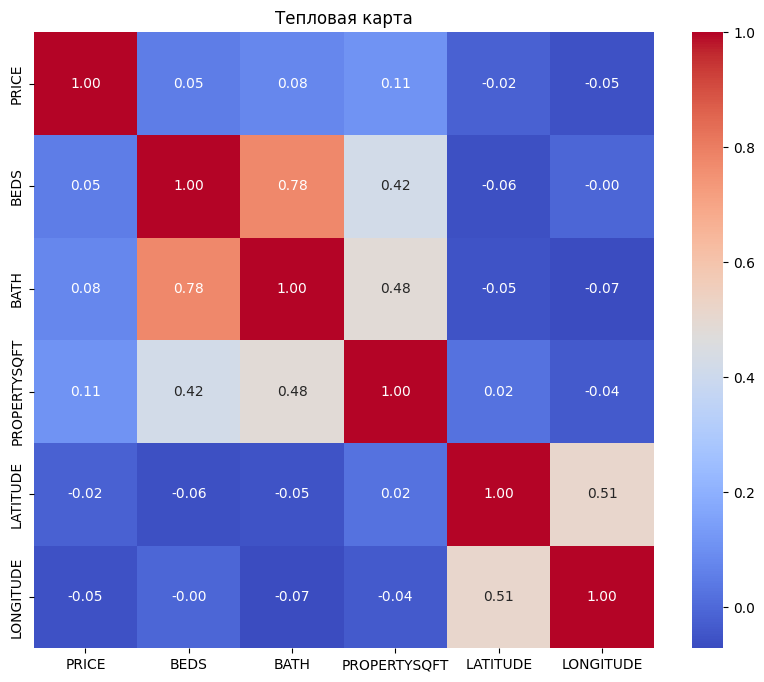

In [2]:
df = pd.read_csv("House.csv")
df = df.dropna()
#print(df)

# Построение матрицы корреляции для количественных данных
correlation_matrix = df.corr(numeric_only=True)

# Вывод матрицы корреляции на экран
print(correlation_matrix)

# Построение тепловой карты для матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта')
plt.show()


### Задание 6
<ol>
<li>Проанализируйте матрицу корреляции и тепловую карту и выберите три пары наиболее коррелирующих друг с другом параметров (ответ запишите в виде комментария в коде)
<li>Постройте для всех трех пар диаграммы рассеяния и проанализируйте, насколько диаграммы соответствуют коэффициентам корреляции (ответ запишите в виде комментария в коде).
</ol>

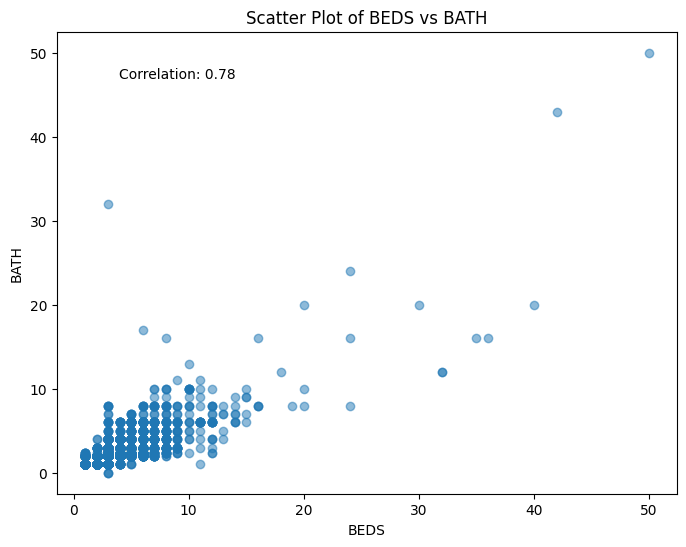

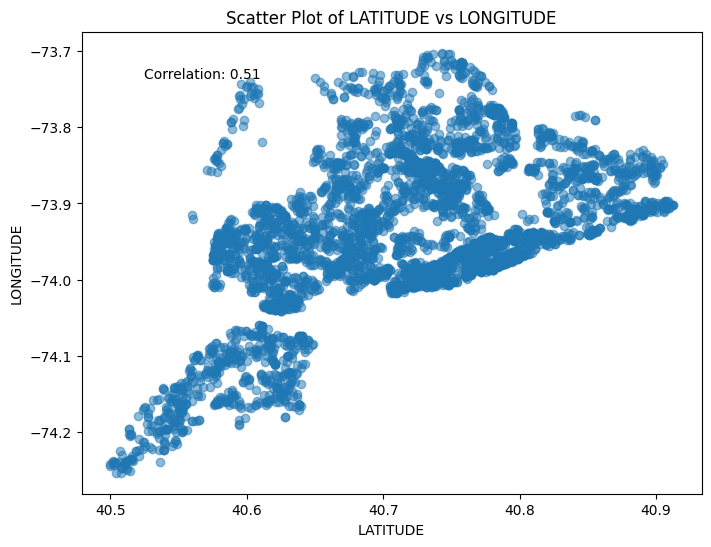

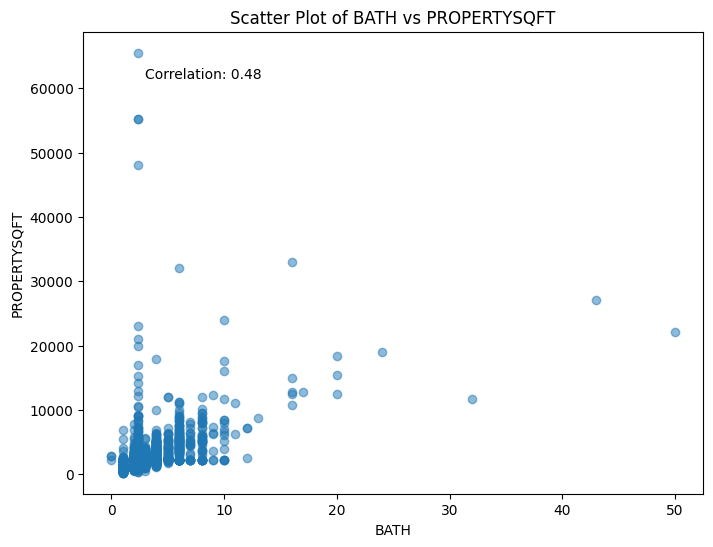

In [3]:
# Выбор трех пар наиболее коррелирующих параметров (где большие циферки не считая главную диагональ)
top_corr_pairs = [
    ('BEDS', 'BATH'),  
    ('LATITUDE', 'LONGITUDE'), 
    ('BATH', 'PROPERTYSQFT')  
]

# Построение диаграмм рассеяния для каждой пары
for pair in top_corr_pairs:
    plt.figure(figsize=(8, 6))
    # Диаграмма рассеяния
    plt.scatter(df[pair[0]], df[pair[1]], alpha=0.5)
    # Настройки графика
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    # Вывод коэффициента корреляции
    correlation_coefficient = df[pair[0]].corr(df[pair[1]])
    plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
    # Отображение графика
    plt.show()

### Задание 7
<ol>
    <li>Удалите выбросы в столбцах PRICE и PROPERTYSQF, используя межквартильный диапазон (про него можно почитать в теории к практике 1 и по <a href = "https://www.codecamp.ru/blog/remove-outliers-python/">ссылке</a>) 
    <li>Выведите информацию об оставшемся количестве строк        
    <li>Снова постройте матрицу корреляции и проведите анализ, как изменились коэффициенты корреляции, связанные с этими двумя полями (записать в виде комментария)        

Количество строк после удаления выбросов: 4111


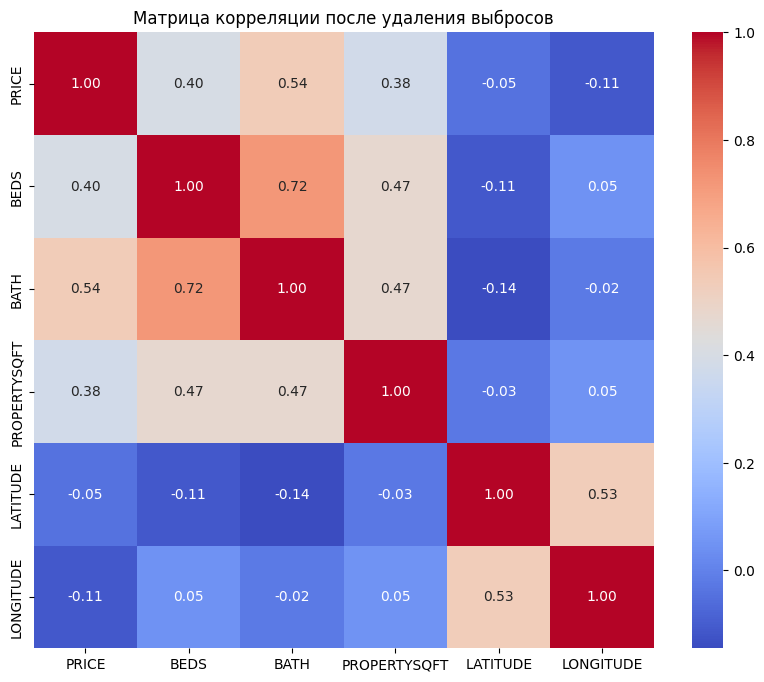

In [4]:
# Функция для удаления выбросов по межквартильному диапазону
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Удаление выбросов в столбцах 'PRICE' и 'PROPERTYSQFT'
df_filtered = remove_outliers_iqr(df, 'PRICE')
df_filtered = remove_outliers_iqr(df_filtered, 'PROPERTYSQFT')

# Вывод информации об оставшемся количестве строк
print("Количество строк после удаления выбросов:", len(df_filtered))

# Построение матрицы корреляции и тепловой карты
correlation_matrix_filtered = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции после удаления выбросов')
plt.show()
